<a href="https://colab.research.google.com/github/Francisco-Galindo/procesamiento-digital-de-senales-tareas/blob/main/TAREA_01_Discrete_Time_Signal_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TAREA 1 — Discrete Time Signal Operations

**Fecha:** 2026-02-16  
**Tema (clase de hoy):** Operaciones en señales en tiempo discreto (DT)

> Entrega: **un solo notebook** con tus soluciones y gráficas.



## Relación con **Serie 1 (ejercicios en papel)**

Esta tarea es la **extensión computacional** de la Serie 1.

**Flujo recomendado (por ejercicio):**
1) Resuelve **en papel** (análisis / fórmulas / razonamiento).
2) Implementa aquí para **verificar** con código y gráficas.
3) Si hay contradicción: **debug** hasta entender el error (en el papel o en el código).

### Mapeo rápido (Serie 1 → Notebook)

- **Serie 1 #4** (u[n], δ[n], r[n]) → **Notebook Ejercicio 1**
- **Serie 1 #2** (periodicidad de cos) → **Notebook Ejercicio 2**
- **Serie 1 #5–7** (inversión y corrimientos) → **Notebook Ejercicio 3**
- **Serie 1 #11** (media y RMS) → **Notebook Ejercicio 4**
- **Serie 1 #9** (energía de (0.9)^n u[n]) → **Notebook Ejercicio 5**
- **Serie 1 #12** (auto/cross correlación) → **Notebook Ejercicio 6**



## Reglas (importantes)

- Puedes usar ChatGPT (u otra IA) **solo como verificador**.
- Tu notebook debe incluir tu razonamiento (comentarios) y tu código.
- **No uses atajos** que oculten la idea:
  - `np.roll`, `np.flip`, `x[::-1]` (para inversión), `np.convolve`, `np.correlate`
- Sí puedes usar NumPy básico, `for` loops, y operaciones elementales.

**Pista:** Si tu solución cabe en 1 línea usando una función “mágica”, probablemente no cuenta.


**Clave:** La IA NO sustituye el papel. Úsala para *verificar* y para detectar errores, igual que usarías una calculadora.



## 1) Datos del estudiante

Completa esta celda y vuelve a correrla.


In [ ]:

# === Datos del estudiante ===
NOMBRE = "Francisco Galindo Mena"
GRUPO = "4"

print("Nombre:", NOMBRE)
print("Grupo:", GRUPO)


Nombre: Francisco Galindo Mena
Grupo: 4



## 2) Imports y configuración (no modificar)

Esta sección es scaffolding para que no pierdas tiempo con formato de gráficas.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (7, 3)
plt.rcParams["axes.grid"] = True
np.set_printoptions(precision=4, suppress=True)



## 3) (Opcional) Subir foto de tu libreta / sketch

Si dibujas a mano alguna señal, puedes subirla aquí como evidencia.


In [ ]:

# (Opcional) En Colab:
# from google.colab import files
# uploaded = files.upload()

# (Opcional) Mostrar una imagen subida (si aplica):
# from PIL import Image
# import io
# fname = list(uploaded.keys())[0]
# img = Image.open(io.BytesIO(uploaded[fname]))
# plt.figure(figsize=(6,4))
# plt.imshow(img); plt.axis("off"); plt.title(fname)
# plt.show()



## 4) Funciones de graficación (scaffold)

Usa estas funciones para graficar de forma consistente.


In [ ]:

def stem_plot(n, x, title="", xlabel="n", ylabel="x[n]"):
    """Discrete-time stem plot."""
    n = np.asarray(n)
    x = np.asarray(x)
    markerline, stemlines, baseline = plt.stem(n, x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def compare_stem(n, x1, x2, label1="x1", label2="x2", title=""):
    """Compare two discrete-time signals on the same axes."""
    n = np.asarray(n)
    x1 = np.asarray(x1); x2 = np.asarray(x2)
    plt.stem(n, x1, use_line_collection=True)
    plt.stem(n, x2, use_line_collection=True)
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("amplitud")
    plt.legend([label1, label2])
    plt.grid(True)
    plt.show()



## 5) Funciones que debes implementar

Implementa **sin** usar atajos (`np.roll`, `np.flip`, slicing invertido, etc.).


In [ ]:

# Propuesta tipo de dato para señales no causales (no usada para no modificar stem_plot)
class Signal:
    def __init__(self, data, start_idx):
      self.data = data
      self.start_idx = start_idx # Indica cuál es el primer índice que sale

def time_reverse(x):
    """Return x_rev[n] = x[-n] assuming x is indexed on n=0..N-1 (finite-length)."""
    x_rev = np.empty_like(x)
    N = len(x)
    for i in range(N):
      x_rev[i] = x[N-i-1]
    return x_rev

def time_shift(x, k, pad_value=0.0):
    """Return x_shift[n] = x[n-k]. Positive k shifts RIGHT (delay)."""
    padding = np.full(shape=abs(k), fill_value=pad_value)
    if k > 0:
      return np.append(padding, x)
    return np.append(x, padding)

def energy(x):
    """E = sum |x[n]|^2 for the available samples."""
    E = 0
    for x_n in x:
      E += x_n**2
    return E

def mean_value(x):
    """Mean over available samples."""
    s = 0
    for x_n in x:
      s += x_n
    return s / len(x)

def rms(x):
    """RMS over available samples."""
    s = 0
    for x_n in x:
      s += x_n**2
    return np.sqrt(s / len(x))

def autocorr(x):
    """Autocorrelation for lags k = -(N-1)..(N-1). Return (k_vals, rxx)."""
    return crosscorr(x, x)

def crosscorr(x, y):
    """Cross-correlation r_xy[k] for lags k = -(N-1)..(N-1). Return (k_vals, rxy). The lengths must be the same"""
    N = len(x)
    M = len(y)
    if N != M:
      raise ValueError("x and y must have the same length")

    k_vals = np.arange(-(N-1), N)
    rxy = np.zeros(len(k_vals))
    i = 0
    for k in k_vals:
      # rxx_k = np.sum(time_shift(x, k) * time_shift(y, -k))
      # x_shift = time_shift(x, k)
      # y_shift = time_shift(x, -k)
      # rxx_k = 0
      # for j in range():
      #     rxy_k += x_sfhit[j] * y_shift[j]

      rxy[i] = np.dot(time_shift(x, k), time_shift(y, -k))
      i += 1

    return (k_vals, rxy)



## 6) Ejercicios

En cada ejercicio:
1) escribe tu razonamiento en comentarios,
2) implementa,
3) grafica y verifica visualmente.



### Ejercicio 1 — Señales básicas

Para **-5 ≤ n ≤ 5**, construye y grafica:
- a) u[n]
- b) δ[n]
- c) r[n] = n u[n]

**TODO:** crea `n`, `u`, `delta`, `r` y grafícalas con `stem_plot`.


📌 Conecta con **Serie 1 #4** (u[n], δ[n], r[n]).

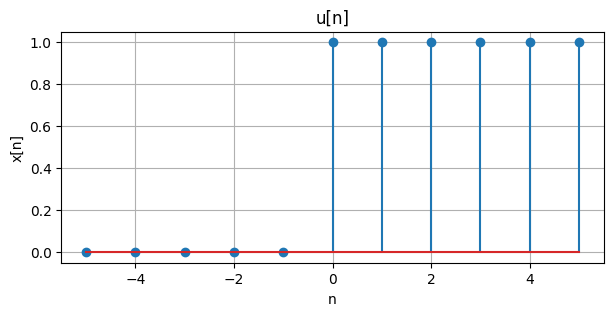

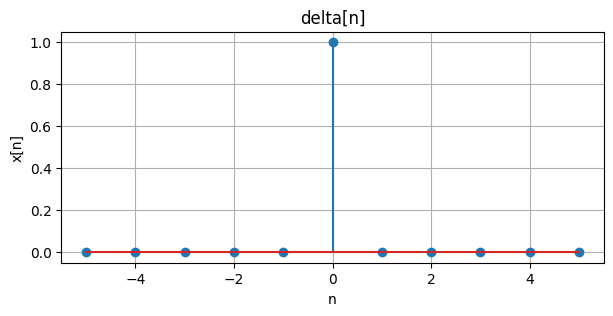

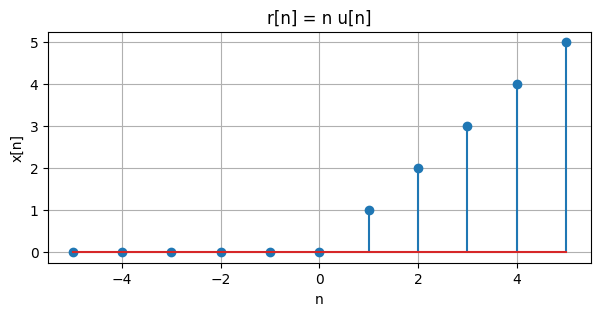

In [ ]:

n = np.arange(-5, 6)

# u[n]
# La sobrecarga de operadores me permite hacer estas actividades de una sóla vez
u = (n >= 0).astype(int)
# u = np.zeros(len(n))
# for i in range(len(n)):
  # u[i] = 1 if n[i] >= 0 else 0


# δ[n]
delta = (n == 0).astype(int)
# u = np.zeros(len(n))
# for i in range(len(n)):
  # u[i] = 1 if n[i] >= 0 else 0
# r[n] = n u[n]
r =n * u

# Graficar
stem_plot(n, u, title="u[n]")
stem_plot(n, delta, title="delta[n]")
stem_plot(n, r, title="r[n] = n u[n]")



### Ejercicio 2 — Periodicidad de x[n] = cos((5π/6)n)

1) Determina si es periódica.  
2) Si lo es, encuentra su **periodo fundamental** N0.

**TODO:** explica en texto (markdown o comentarios) y verifica con una gráfica de varios periodos.


📌 Conecta con **Serie 1 #2** (periodicidad de cos(·)).

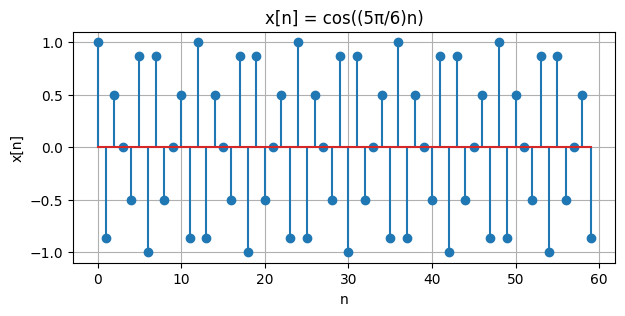

In [ ]:

# It is periodic, since all sinusoids are periodic.
# In the case of discrete sinusoids, it is periodic if $\omega / 2 \pi$ is rational,
# which it is in this case

# Its fundamental period is 12, because the period of $cos(x)$ is $2\pi$
# and 12 is the smallest number such that $n (5 \pi / 6 ) \% 2 \pi = 0$

# Verificación numérica (opcional):
n = np.arange(0, 60)
x = np.cos((5*np.pi/6)*n)
stem_plot(n, x, title="x[n] = cos((5π/6)n)")



### Ejercicio 3 — Transformaciones en una secuencia finita

Dada: **x[n] = {1,2,3,4}** para n = 0,1,2,3

Calcula y grafica:
- a) x[-n]
- b) x[n-2]
- c) x[n+1]
- d) x[-n+2]
- e) x[3-n]

**Nota:** Define claramente tu eje n para cada resultado (con padding si hace falta).


📌 Conecta con **Serie 1 #5–7** (x[-n], x[n±k], composiciones).

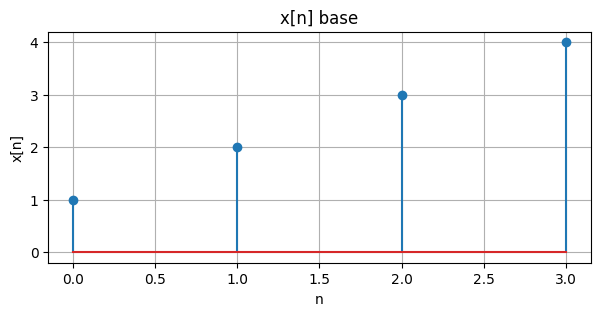

[0. 0. 1. 2. 3. 4.]
[1. 2. 3. 4. 0.]


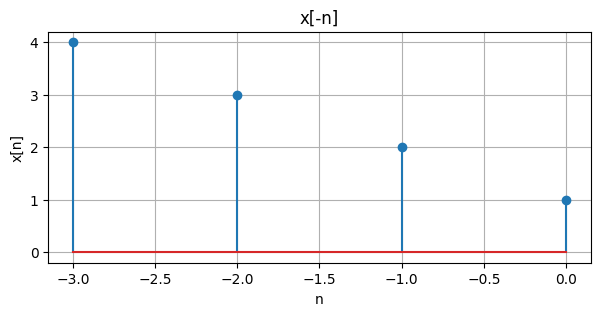

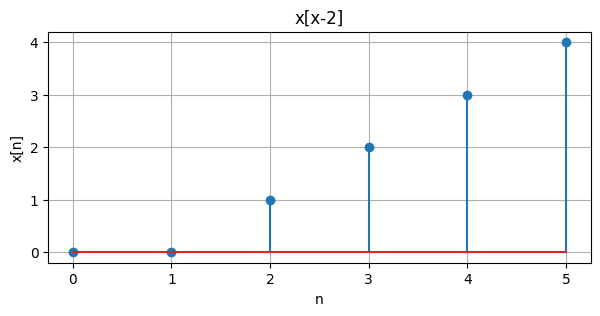

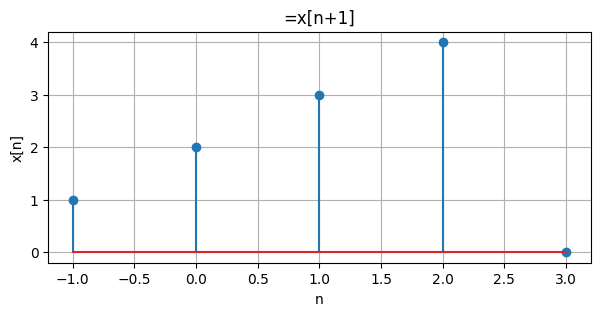

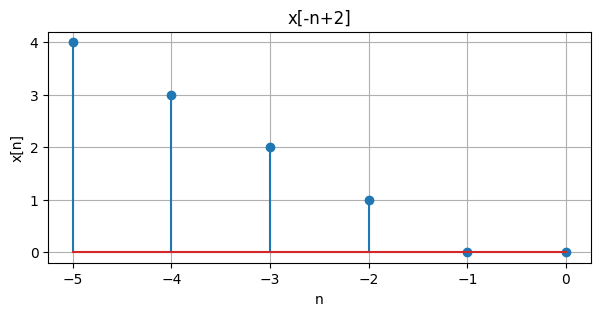

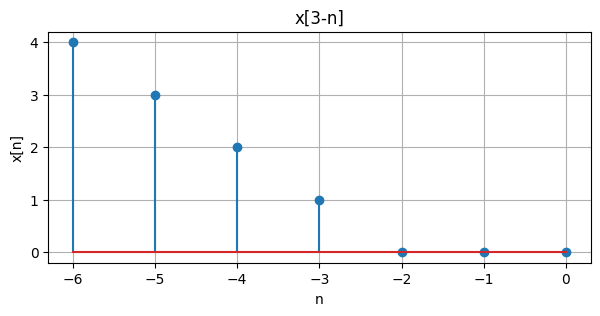

In [ ]:

# Señal base
x = np.array([1,2,3,4], dtype=float)
n = np.arange(0, len(x))

stem_plot(n, x, title="x[n] base")

# TODO: usa tus funciones time_reverse / time_shift
x_rev = time_reverse(x)
x_delay2 = time_shift(x, 2)
print(x_delay2)
x_adv1 = time_shift(x, -1)
print(x_adv1)

stem_plot(np.arange(-len(x)+1, 1), x_rev, title="x[-n]")
stem_plot(np.arange(0,len(x_delay2)), x_delay2, title="x[x-2]")
stem_plot(np.arange(-1, -1 + len(x_adv1)), x_adv1, title="=x[n+1]")

# Luego construye:
x_minus_n_plus_2 = time_shift(time_reverse(x), -2)
x_3_minus_n =  time_shift(time_reverse(x), -3)

stem_plot(np.arange(-len(x_minus_n_plus_2) + 2-1, 1), x_minus_n_plus_2, title="x[-n+2]")
stem_plot(np.arange(-len(x_3_minus_n)+1, 1), x_3_minus_n, title="x[3-n]")

# TODO: define ejes n adecuados y grafica cada resultado.



### Ejercicio 4 — Energía, media y RMS

Para x[n] = {2, -2, 2, -2} (n=0..3):

1) Calcula la **media**  
2) Calcula el **RMS**  
3) Interpreta: ¿media = 0 implica RMS = 0? (explica)


La media es cero, pues la suma algebráica de todas las muestras es de cero. RMS *no es cero*, porque trabajamos con valores absolutos, así que el RMS de esta señal sería el mismo que el de la señal `[2, 2, 2, 2]`. Aquí, el valor medio es efectivamente 2.


📌 Conecta con **Serie 1 #11** (media y RMS).

In [ ]:

x = np.array([2, -2, 2, -2], dtype=float)

# TODO
m = mean_value(x)
r = rms(x)
print("Media:", m)
print("RMS:", r)


Media: 0.0
RMS: 2.0



### Ejercicio 5 — Energía (señal exponencial DT truncada)

Define una señal finita:
x[n] = (0.9)^n u[n]  para n = 0..30

1) Grafica x[n]  
2) Calcula la energía aproximada en ese intervalo (truncado)  
3) Explica qué pasaría si el intervalo fuera infinito (conceptual)


📌 Conecta con **Serie 1 #9** (energía de (0.9)^n u[n]).

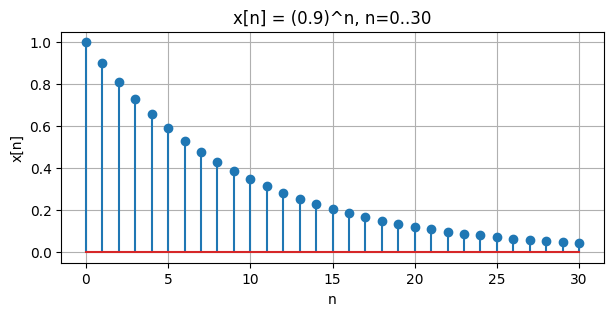

Energía (truncada 0..30): 5.255496956089839
Energía (truncada 0..30000): 5.2631578947368425


In [ ]:

n = np.arange(0, 31)
x = (0.9**n)  # u[n]=1 para n>=0 en este rango

stem_plot(n, x, title="x[n] = (0.9)^n, n=0..30")

# TODO
E = energy(x)
print("Energía (truncada 0..30):", E)

n = np.arange(0, 30000)
x = (0.9**n)  # u[n]=1 para n>=0 en este rango

E = energy(x)
print("Energía (truncada 0..30000):", E)

Utilizar una cota que vaya a valores negativos no modifica el resultado, pues $u[n]=0$ cuando $n<0$. Ninguno de los términos a la izquierda del zero contribuyen en nada.

Al crecer la cota a valores positivos, cada nueva muestra contribuye cada vez menos porque $lim_{n\to \infty} 0.9^{n} = 0$. Podemovs ver que al crecer mucho la cota, la energía total no cambia significativamente,


### Ejercicio 6 — Correlación (sin funciones mágicas)

x[n] = {1,2,1}  
y[n] = {1,0,-1}

1) Calcula la **autocorrelación** r_xx[k]  
2) Calcula la **correlación cruzada** r_xy[k]  
3) Grafica r_xx[k] y r_xy[k] con eje de lags k.



📌 Conecta con **Serie 1 #12** (autocorrelación y correlación cruzada).

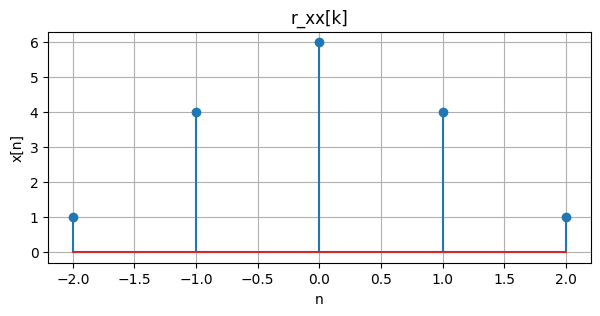

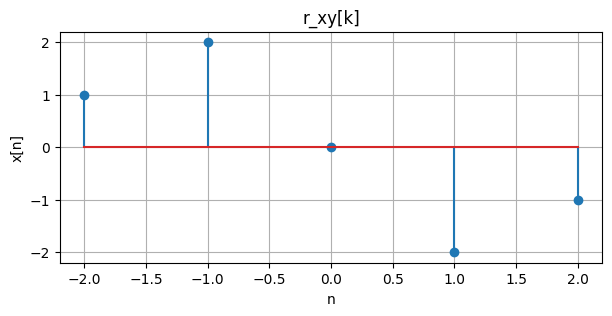

In [ ]:

x = np.array([1,2,1], dtype=float)
y = np.array([1,0,-1], dtype=float)

k, rxx = autocorr(x)
stem_plot(k, rxx, title="r_xx[k]")

k, rxy = crosscorr(x, y)
stem_plot(k, rxy, title="r_xy[k]")



## 🔊 Sección Audio (extensión opcional)

**Idea:** Graba audio (con tu celular, Audacity, etc.), guarda un `.wav` y súbelo al notebook.

- En **Colab**: usa `files.upload()` (celda siguiente).
- En **Jupyter local**: coloca el `.wav` en la misma carpeta del notebook y pon el nombre en `wav_path`.

> Esta sección es para experimentar con **señales reales** usando las mismas operaciones DT.


In [ ]:

# === (Colab) Subir WAV (MISMO PATRÓN DEL EJEMPLO) ===
from google.colab import files
uploaded = files.upload()  # elige tu archivo .wav

# TODO: escribe EXACTAMENTE el nombre del archivo que subiste (tal como aparece arriba)
wav_path = "basswav.wav"

print("Usando wav_path =", wav_path)


Saving basswav.wav to basswav.wav
Usando wav_path = basswav.wav


In [ ]:

# === Cargar WAV (se mantiene simple y robusto) ===
# Intentamos soundfile primero; si no está, usamos scipy.io.wavfile.
fs = None
audio = None

audio_loaded = False

try:
    import soundfile as sf
    audio, fs = sf.read(wav_path, dtype="float32", always_2d=False)
    audio_loaded = True
except Exception as e:
    print("soundfile falló o no está instalado:", e)

if not audio_loaded:
    try:
        from scipy.io import wavfile
        fs, audio_int = wavfile.read(wav_path)

        # Si es estéreo, toma un canal (puedes cambiarlo)
        if hasattr(audio_int, "ndim") and audio_int.ndim > 1:
            audio_int = audio_int[:, 0]

        # Normaliza a float32 en [-1, 1] si viene en entero
        if np.issubdtype(audio_int.dtype, np.integer):
            max_val = np.iinfo(audio_int.dtype).max
            audio = audio_int.astype("float32") / max_val
        else:
            audio = audio_int.astype("float32")

        audio_loaded = True
    except Exception as e:
        print("No pude cargar el WAV con scipy tampoco:", e)

if audio_loaded:
    print("fs =", fs, "Hz")
    print("muestras =", len(audio))


fs = 44100 Hz
muestras = 453349


500 500


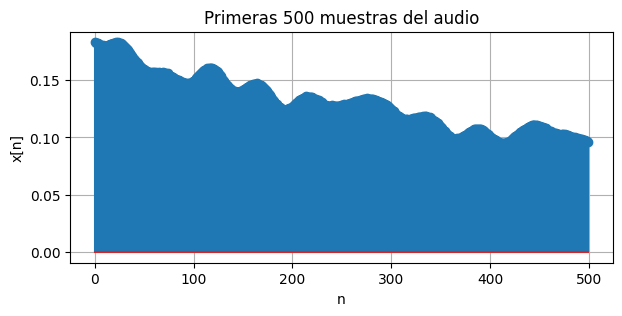

In [ ]:

# === Visualización (muestra corta) ===
# Graficamos solo las primeras N muestras para que se vea tipo DT.
N = 500  # puedes cambiar
if audio is not None:
    n = np.arange(len(audio))
    print(len(n[:N]), len(audio[:N]))
    stem_plot(n[:N], audio[:N, 0], title=f"Primeras {N} muestras del audio")
else:
    print('what')


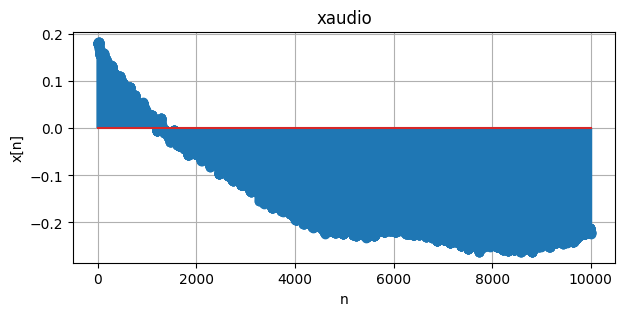

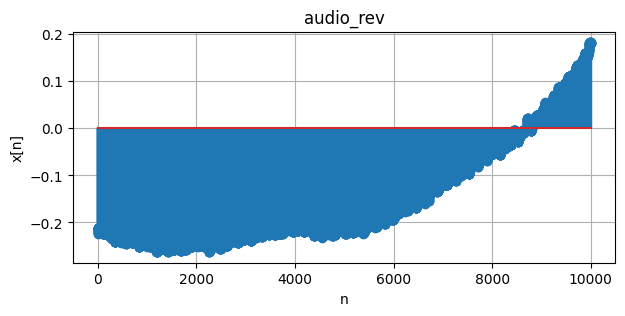

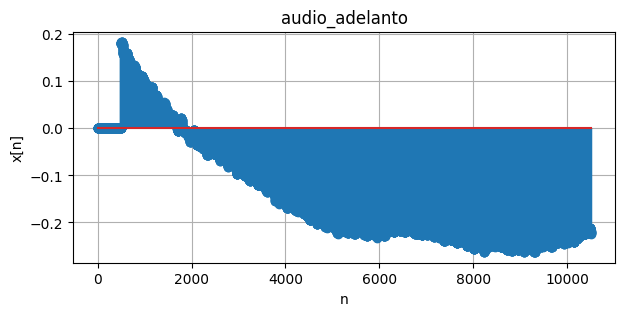

352.64825 352.6463122814894
40


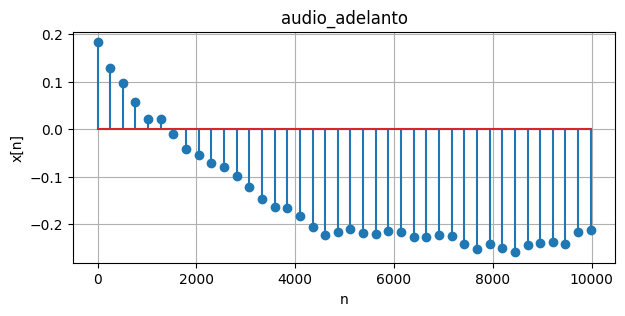

In [ ]:

# === Experimentos sugeridos (TODO) ===
# 1) Invertir: usa time_reverse(audio_short) sobre una ventana corta (ej. primeras 2000 muestras)
# 2) Corrimiento: aplica time_shift(..., k=200) (retardo) o k=-200 (adelanto)
# 3) Energía: compara energy(x) antes/después (¿cambia? ¿por qué?)
# 4) Submuestreo manual: crea x_ds = audio[::M] (aquí SÍ se permite slicing por submuestreo)
#
# Nota: Para no hacer señales enormes, trabaja con una ventana:
N = 10000
audio_w = audio[:N, 0]
stem_plot(np.arange(N), audio_w, title="xaudio")
stem_plot(np.arange(N), time_reverse(audio_w), title="audio_rev")

k = 500
audio_delay = time_shift(audio_w, k)
stem_plot(np.arange(N+k), audio_delay, title="audio_adelanto")

print(energy(audio_w), energy(audio_delay))

M = 256
x_ds = audio_w[::M]
print(len(x_ds))
stem_plot(np.arange(len(x_ds)*M, step=M), x_ds, title="audio_adelanto")



## 7) IA (requerido)

Para **al menos 3 ejercicios**, incluye:

1) Tu solución manual/código  
2) El prompt exacto que usaste con IA  
3) Una comparación breve: ¿en qué coincide y en qué no? ¿por qué?

> Objetivo: aprender a **verificar**, no a copiar.


- Para el ejercicio de periodicidad:

  - Prompt:
  ```
  Esta es una pregunta sobre señales discretas. Responde de manera breve, pues irá en los comentarios de un bloque de código:



  Ejercicio 2 — Periodicidad de x[n] = cos((5π/6)n)

  Determina si es periódica.

  Si lo es, encuentra su periodo fundamental N0.
  ```
  - La respuesta dada por Google Gemini fue la siguiente:
  ```
  Resumen para código:
  // La señal es periódica porque (5pi/6) / (2pi) = 5/12 (racional).
  // Periodo fundamental N0 = 12.
  ```
  - Mi respuesta
      
  It is periodic, since all sinusoids are periodic. In the case of discrete sinusoids, it is periodic if $\omega / 2 \pi$ is rational, which it is in this case

  Its fundamental period is 12, because the period of $cos(x)$ is $2\pi$ and 12 is the smallest number such that $n (5 \pi / 6 ) \% 2 \pi = 0$

  - Comparación

    La respuesta es muy similar, pues en ambos casos se utiliza el mismo argumento para determinar la periodicidad y N0 de la señal.

- Para plottear señal escalón, delta y rampa

  - Promp
  - Respuesta de Google Gemini

    ```
    # Definición del rango de la señal
    n = np.arange(-5, 6)

    # Escalón unitario u[n]: 1 si n >= 0, de lo contrario 0
    u = (n >= 0).astype(int)

    # Impulso unitario δ[n]: 1 solo si n == 0
    delta = (n == 0).astype(int)

    # Rampa unitaria r[n] = n * u[n]
    r = n * u
    ```
  - Comparación

    Las respuestas son práticamente iguales. Esto es de esperarse, pues Numpy permite realizar operaciones en arreglos de manera sencilla con sobrecarga de operadores (donde `n == 0` devolverá `[n[i] == 0 for i in n]` en una sóla operación). De esta manera, la solución es de una línea y fácil de escribir.
- Crosscorrelation
  - Implementa una función que encuentre la correlación cruzada de dos arreglos de numpy usando esta base:
    ```
    def crosscorr(x, y):
      """Cross-correlation r_xy[k] for lags k = -(N-1)..(N-1). Return (k_vals, rxy). The lengths must be the same"""
      pass
    ```
  - Respuesta de Google Gemini

    ```
    import numpy as np

    def crosscorr(x, y):
        """Calcula la correlación cruzada manual para lags k."""
        N = len(x)
        # Rango de desplazamientos: de -(N-1) hasta (N-1)
        k_vals = np.arange(-(N - 1), N)
        rxy = []

        for k in k_vals:
            # 1. Desplazamos y por 'k' posiciones
            y_shifted = np.roll(y, k)
            
            # 2. "Limpiamos" los valores que rotaron pero deberían ser cero (fuera de rango)
            if k > 0:
                y_shifted[:k] = 0
            elif k < 0:
                y_shifted[k:] = 0 # k es negativo, limpia el final
            
            # 3. Producto punto (suma de productos x[n] * y[n-k])
            valor_corr = np.sum(x * y_shifted)
            rxy.append(valor_corr)

        return k_vals, np.array(rxy)
    ```

    - Comparación con respuesta mía

      Gemini no sabía de la función `time_shift`, por lo que recurre a hacer una rotación de valores (**Pero esto está prohibido, probablemente debí haber hecho énfasis en el hecho de que no se usaran funciones "trampa"**). Esta estrategia es buena porque permite hacer los *lags* de manera sencilla. También se utiliza la sobrecarga del operador `*` para multiplicar los elementos de un arreglo con poco código.




## Checklist antes de entregar

- [ ] Tu nombre/matrícula/grupo están completos  
- [ ] Todas las celdas corren sin error  
- [ ] Hay gráficas claras para cada ejercicio  
- [ ] No usaste funciones prohibidas  
- [ ] Incluiste la sección de IA (3 ejercicios mínimo)
